# Library

In [186]:
import json
import pandas as pd
import numpy as np
import requests
import time
from tqdm import tqdm

# Price Summary

In [222]:
start_date = '2024-03-01'
end_date = '2024-09-01'

headers = {
    'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
    'sec-ch-ua-platform': '"macOS"',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
    'lang': 'en',
    'X-Currency': 'USD',
    'Referer': 'https://en.tiket.com/pesawat/search?d=LAX&a=JKTC&date=2024-03-09&adult=1&child=0&infant=0&class=economy&dType=AIRPORT&aType=CITY&dLabel=Los%20Angeles&aLabel=Jakarta&type=depart&flexiFare=true',
    'X-Audience': 'tiket.com',
    'X-Request-Id': '634ab02c-f620-4986-b851-676e68b772d2',
    'X-Cookie-Session-V2': 'true',
}

params = {
    'origin': 'CGK',
    'originType': 'AIRPORT',
    'destination': 'LAX',
    'destinationType': 'AIRPORT',
    'adult': '1',
    'child': '0',
    'infant': '0',
    'cabinClass': 'ECONOMY',
    'startDate': start_date,
    'endDate': end_date,
    'flightAggregateType': 'OW',
}

response = requests.get('https://en.tiket.com/ms-gateway/tix-price-summary/v3/priceSummary', params=params, headers=headers)

In [223]:
res = json.loads(response.text)['data']['priceSummary']

In [224]:
price_summary = []

for i in range(len(res)):
    price_summary.append([res[i]['date'], res[i]['price'], res[i]['status'], res[i]['isBestPrice']])

In [225]:
df_price_summary = pd.DataFrame(price_summary, columns=['date', 'price_usd', 'status', 'is_best_price']).sort_values(by = 'date')
df_price_summary['price_usd'] = df_price_summary['price_usd']/100
df_price_summary.head(10)

,date,price_usd,status,is_best_price
156,2024-03-01,769.63,SUCCESS,False
155,2024-03-02,769.62,SUCCESS,False
117,2024-03-03,703.21,SUCCESS,False
108,2024-03-04,697.85,SUCCESS,False
82,2024-03-05,630.86,SUCCESS,False
115,2024-03-06,701.65,SUCCESS,False
83,2024-03-07,631.38,SUCCESS,False
141,2024-03-08,750.15,SUCCESS,False
153,2024-03-09,766.36,SUCCESS,False
46,2024-03-10,620.60,SUCCESS,False


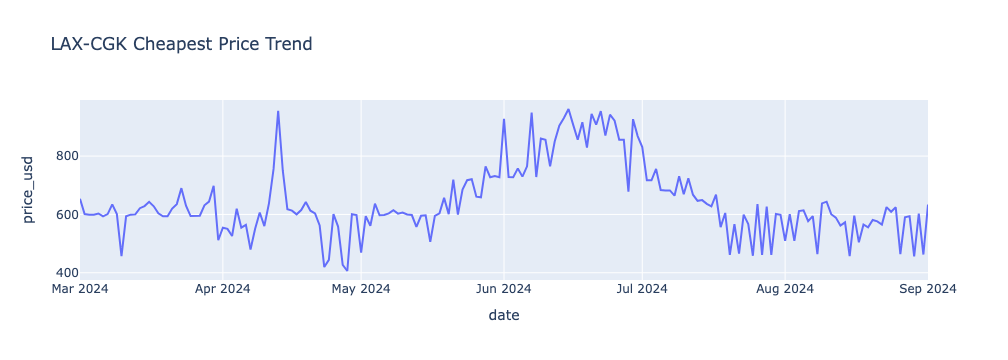

In [221]:
import plotly.express as px
import pandas as pd

# Create a line plot using Plotly Express
fig = px.line(df_price_summary, x='date', y='price_usd', title='LAX-CGK Cheapest Price Trend')

# Show the plot
fig.show()

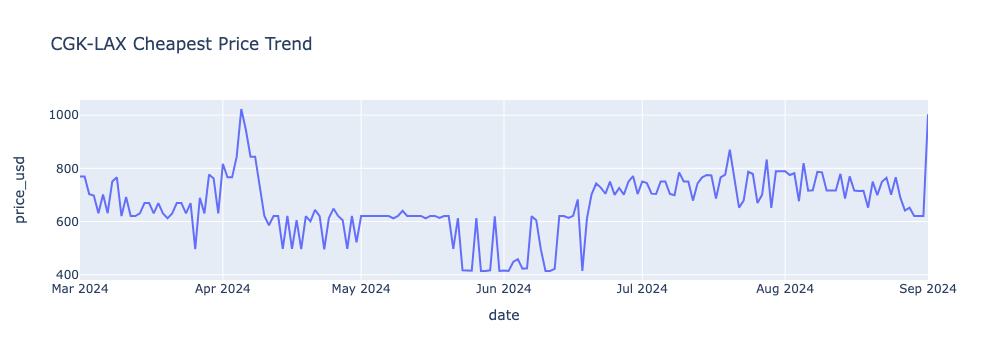

In [227]:
import plotly.express as px
import pandas as pd

# Create a line plot using Plotly Express
fig = px.line(df_price_summary, x='date', y='price_usd', title='CGK-LAX Cheapest Price Trend')

# Show the plot
fig.show()

# Flight Details

In [228]:
date_list = list(df_price_summary['date'])
date_list[:10]

['2024-03-01',
 '2024-03-02',
 '2024-03-03',
 '2024-03-04',
 '2024-03-05',
 '2024-03-06',
 '2024-03-07',
 '2024-03-08',
 '2024-03-09',
 '2024-03-10']

In [235]:
response_list = []

for date in tqdm(date_list, desc="Processing", unit="item"):

    headers = {
        'sec-ch-ua': '"Not A(Brand";v="99", "Google Chrome";v="121", "Chromium";v="121"',
        'sec-ch-ua-platform': '"macOS"',
        'sec-ch-ua-mobile': '?0',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
        'lang': 'en',
        'X-Currency': 'USD',
        'Referer': 'https://en.tiket.com/pesawat/search?d=LAX&a=CGK&date=2024-03-01&adult=1&child=0&infant=0&class=economy&dType=AIRPORT&aType=AIRPORT&dLabel=Los%20Angeles&aLabel=Jakarta&type=depart&flexiFare=true',
        'X-Audience': 'tiket.com',
        'X-Request-Id': 'f171df87-68f1-4b94-9601-fe26e016ac2e',
        'X-Cookie-Session-V2': 'true',
    }

    params = {
        'origin': 'LAX',
        'originType': 'AIRPORT',
        'destination': 'CGK',
        'destinationType': 'AIRPORT',
        'adult': '1',
        'child': '0',
        'infant': '0',
        'cabinClass': 'ECONOMY',
        'departureDate': date,
        'flexiFare': 'true',
        'resultType': 'DEPARTURE',
        'searchType': 'ONE_WAY',
    }

    response = requests.get('https://en.tiket.com/ms-gateway/tix-flight-search/v3/search', params=params, headers=headers)

    # json.loads(response.text)['data']['searchList']['departureFlights']
    response_list.append(response.text)
    
    time.sleep(2)

Processing:  56%|███████████████            | 103/184 [05:13<04:06,  3.04s/item]


KeyboardInterrupt: 

In [190]:
res = json.loads(response.text)['data']['searchList']['departureFlights']
res[0]

TypeError: 'NoneType' object is not subscriptable

In [248]:
len(json.loads(response_list[3])['data']['searchList']['departureFlights'])

258

In [276]:
a= []
b = [1]
a+ b

[1]

In [294]:
flight_list = []
flight_list_final = []

col_list = ['dep_date'
            , 'flight_code'
            , 'dep_airport_code'
            , 'arv_airport_code'
            , 'travel_time_minutes'
            , 'transit_time_minutes'
            , 'total_transit'
            , 'seat_availability'
            , 'cabin_class'
            , 'fare'
            , 'currency'
            ###
            , 'airport_code'
            , 'aircraft'
            ###
           ]

for r in range(len(response_list)):

    res = json.loads(response_list[r])['data']['searchList']['departureFlights']
    
    for i in range(len(res)):
        flight_list.append([res[i]['schedules'][0]['departureDetail']['date']
                              , res[i]['flightSelect'].split('|')
                              , res[i]['departureAirportCode']
                              , res[i]['arrivalAirportCode']
                              , res[i]['totalTravelTimeInMinutes']
                              , res[i]['totalTransitTimeInMinutes']
                              , res[i]['totalTransit']
                              , res[i]['seatAvailability']
                              , res[i]['cabinClass']
                              , res[i]['fareDetail']['cheapestFare']/100
                              , res[i]['currency']])

        temp_code = []
        temp_aircraft = []

        for j in range(len(res[i]['schedules'])):
            temp_code.append(res[i]['schedules'][j]['departureDetail']['airportCode'])
            temp_aircraft.append(res[i]['schedules'][j]['facilitiesValue']['aircraft'])

            if j == len(res[i]['schedules']) - 1:
                flight_list[i].append(temp_code)
                flight_list[i].append(temp_aircraft)
        
    flight_list_final += flight_list
        
    flight_list = []

df_flight_list = pd.DataFrame(flight_list_final, columns = col_list)

df_flight_list[['flight_code_1','flight_code_2', 'flight_code_3']] = pd.DataFrame(df_flight_list['flight_code'].tolist(), index= df_flight_list.index)
df_flight_list[['dep','airport_transit_1', 'airport_transit_2']] = pd.DataFrame(df_flight_list['airport_code'].tolist(), index= df_flight_list.index)
df_flight_list[['aircraft_1','aircraft_2', 'aircraft_3']] = pd.DataFrame(df_flight_list['aircraft'].tolist(), index= df_flight_list.index)

df_flight_list.head()

,dep_date,flight_code,dep_airport_code,arv_airport_code,travel_time_minutes,transit_time_minutes,total_transit,seat_availability,cabin_class,fare,...,aircraft,flight_code_1,flight_code_2,flight_code_3,dep,airport_transit_1,airport_transit_2,aircraft_1,aircraft_2,aircraft_3
0,2024-03-01,"[UA 7925, NH 871]",LAX,CGK,1395,175,1,9,ECONOMY,1539.18,...,"[Boeing 787-9, Boeing 787-8]",UA 7925,NH 871,None,LAX,HND,None,Boeing 787-9,Boeing 787-8,None
1,2024-03-01,"[KE 12, KE 627]",LAX,CGK,1835,595,1,9,ECONOMY,1273.75,...,"[Airbus A380-800, Boeing 777-300ER]",KE 12,KE 627,None,LAX,ICN,None,Airbus A380-800,Boeing 777-300ER,None
2,2024-03-01,"[MH 9475, MH 3, MH 721]",LAX,CGK,3115,1590,2,9,ECONOMY,1432.61,...,"[Boeing 777-200 / Boeing 777-200ER, Airbus A35...",MH 9475,MH 3,MH 721,LAX,LHR,KUL,Boeing 777-200 / Boeing 777-200ER,Airbus A350-900,73H
3,2024-03-01,"[NH 125, NH 5481]",LAX,CGK,2105,875,1,9,ECONOMY,7062.88,...,"[Boeing 787-9, Airbus A330-300]",NH 125,NH 5481,None,LAX,HND,None,Boeing 787-9,Airbus A330-300,None
4,2024-03-01,"[QR 9392, QR 730, QR 958]",LAX,CGK,1715,156,2,7,ECONOMY,2099.00,...,"[Airbus A321, Airbus A350-1000, Boeing 777-300ER]",QR 9392,QR 730,QR 958,LAX,DFW,DOH,Airbus A321,Airbus A350-1000,Boeing 777-300ER


In [295]:
df_flight_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dep_date              9857 non-null   object 
 1   flight_code           9857 non-null   object 
 2   dep_airport_code      9857 non-null   object 
 3   arv_airport_code      9857 non-null   object 
 4   travel_time_minutes   9857 non-null   int64  
 5   transit_time_minutes  9857 non-null   int64  
 6   total_transit         9857 non-null   int64  
 7   seat_availability     9857 non-null   int64  
 8   cabin_class           9857 non-null   object 
 9   fare                  9857 non-null   float64
 10  currency              9857 non-null   object 
 11  airport_code          9857 non-null   object 
 12  aircraft              9857 non-null   object 
 13  flight_code_1         9857 non-null   object 
 14  flight_code_2         9857 non-null   object 
 15  flight_code_3        